In [2]:
!pip install qiskit qiskit_aer


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%matplotlib inline

In [4]:
# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [5]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [6]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


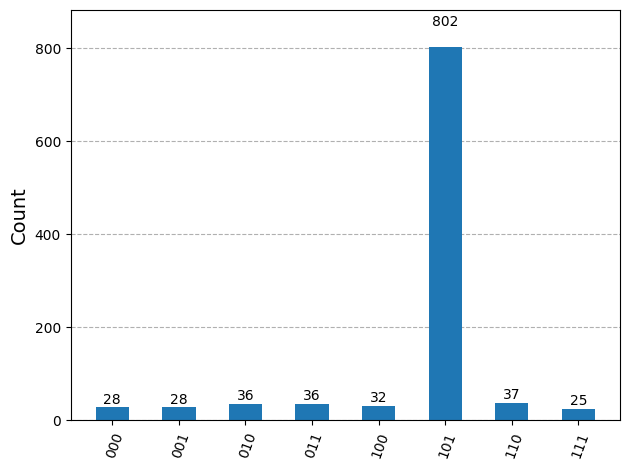

In [7]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

In [8]:
# Task_1 : Change the marked state


🔍 Searching for marked state: 001


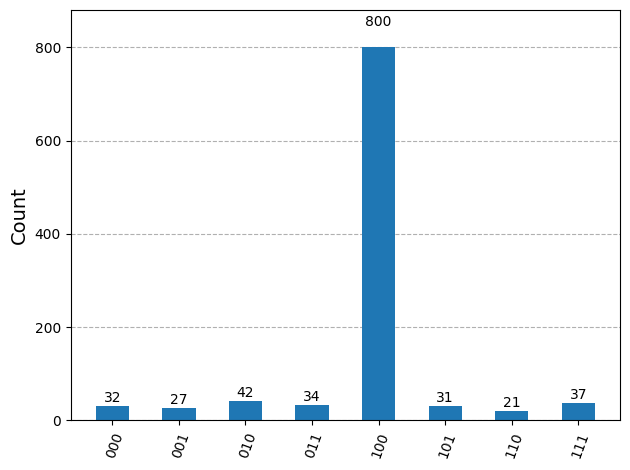


🔍 Searching for marked state: 111


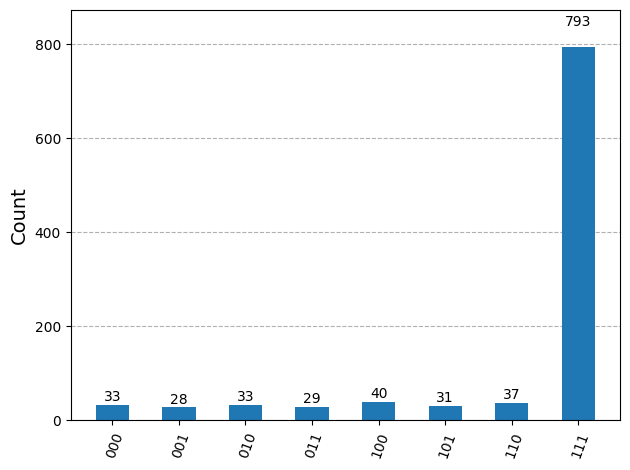


🔍 Searching for marked state: 010


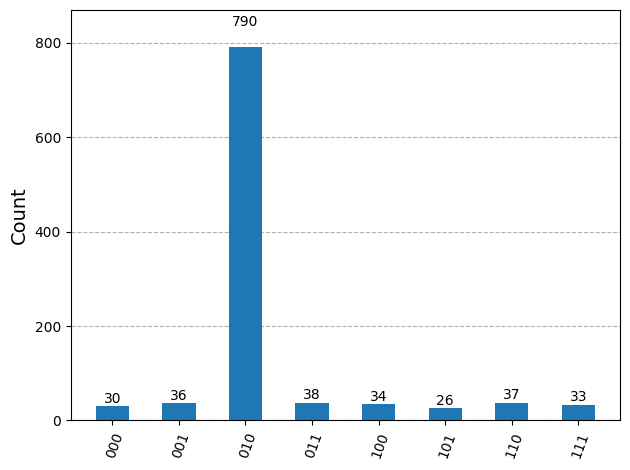

In [9]:
# --- Change the marked state ---
for state in ["001", "111", "010"]:
    print(f"\n🔍 Searching for marked state: {state}")
    qc = grover_search(state)
    run_grover(qc)


In [10]:
'''
The algorithm correctly amplifies the probability of the newly marked state; the histogram shows a peak at whatever state you set.
'''

'\nThe algorithm correctly amplifies the probability of the newly marked state; the histogram shows a peak at whatever state you set.\n'

In [11]:
# Task _2 : Modify the number of qubits

🔍 Searching for marked state: 1011


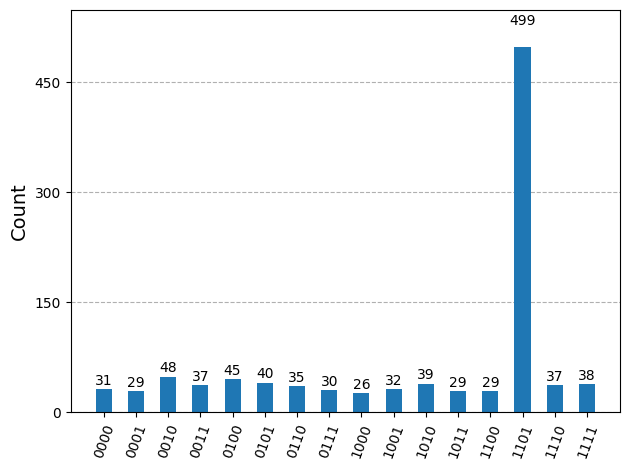

In [12]:
# --- 4-qubit Grover’s algorithm ---
marked_state = "1011"  # example marked state for 4 qubits
print("🔍 Searching for marked state:", marked_state)
qc = grover_search(marked_state)
run_grover(qc)

In [13]:
'''
With more qubits, the search space increases exponentially; the marked state still appears with high probability after the correct number of iterations.
'''

'\nWith more qubits, the search space increases exponentially; the marked state still appears with high probability after the correct number of iterations.\n'

In [14]:
# Task_3 : Add multiple iterations

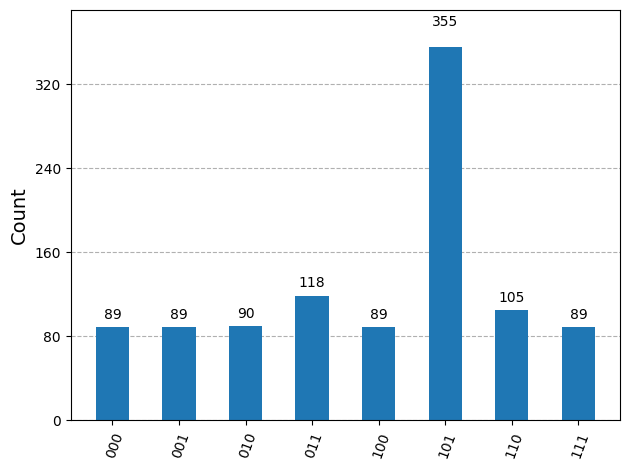

In [15]:
def grover_search_iterations(marked_state, iterations=2):
    """Grover's search with multiple iterations."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

# Example usage:
marked_state = "101"
qc = grover_search_iterations(marked_state, iterations=3)
run_grover(qc)

In [16]:
'''
Repeating Grover’s steps increases the amplitude of the marked state, raising its measurement probability; too many iterations can overshoot and reduce probability.
'''

'\nRepeating Grover’s steps increases the amplitude of the marked state, raising its measurement probability; too many iterations can overshoot and reduce probability.\n'

In [17]:
# Task_4 : Circuit Visualization

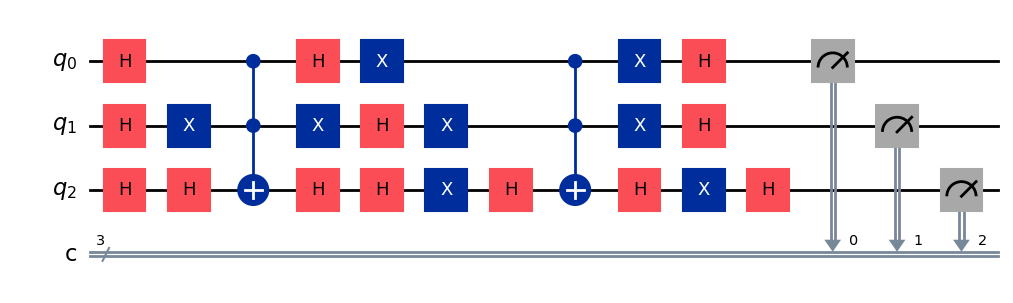

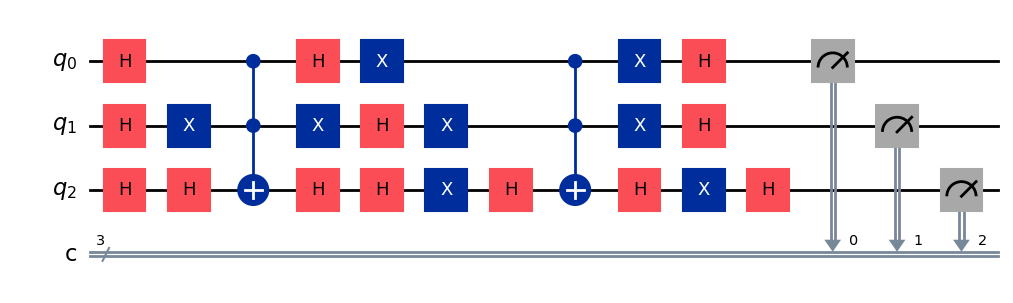

In [18]:
from qiskit.visualization import circuit_drawer

marked_state = "101"
qc = grover_search(marked_state)
qc.draw('mpl')  # or use circuit_drawer(qc, output='mpl')


In [19]:
'''
Visualizing the circuit confirms that Hadamard gates initialize superposition, the oracle flips the marked state phase, and the diffuser amplifies it.
'''

'\nVisualizing the circuit confirms that Hadamard gates initialize superposition, the oracle flips the marked state phase, and the diffuser amplifies it.\n'

In [20]:
# Task_5 : Experiment with Noise

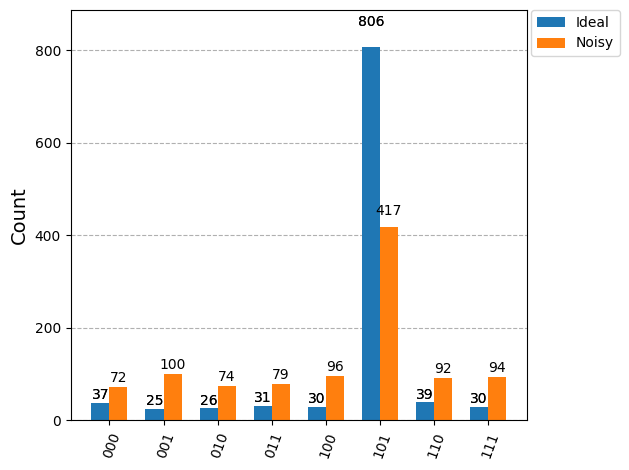

In [21]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Create a simple depolarizing noise model
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 1), ['x', 'h'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ['cx'])

marked_state = "101"
qc = grover_search(marked_state)
simulator = AerSimulator(noise_model=noise_model)

compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts_noisy = result.get_counts()

# Compare with ideal
simulator_ideal = AerSimulator()
ideal_result = simulator_ideal.run(transpile(qc, simulator_ideal), shots=1024).result()
counts_ideal = ideal_result.get_counts()

plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'])
plt.show()

In [22]:
'''
Noise reduces the success probability; the histogram spreads out, showing errors and less pronounced peaks for the marked state compared to the ideal simulator.
'''

'\nNoise reduces the success probability; the histogram spreads out, showing errors and less pronounced peaks for the marked state compared to the ideal simulator.\n'

In [23]:
# Task_6 : Real Hardware Execution (Optional)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform", 
    token="",
    overwrite=True
)

qiskit_runtime_service.__init__:WARNING:2025-11-07 09:43:23,792: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-07 09:43:24,563: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-11-07 09:43:27,561: Using instance: open-instance, plan: open


Using backend: ibm_torino


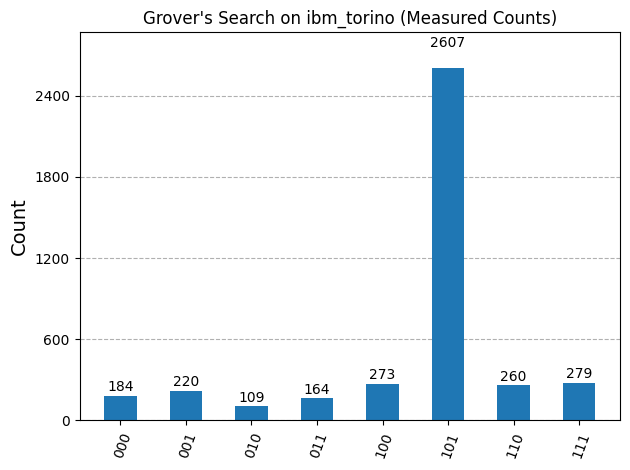

In [30]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit import transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Load IBM Quantum account
service = QiskitRuntimeService(channel="ibm_quantum_platform")
backend = service.least_busy(operational=True, simulator=False)
print(f"Using backend: {backend.name}")

marked_state = "101"
qc = grover_search(marked_state)
tqc = transpile(qc, backend)

sampler = SamplerV2(backend)

job = sampler.run(
    pubs=[(tqc, None)],
)

result = job.result()

bitarray = result[0].data.c
counts = bitarray.get_counts()

plot_histogram(counts, title=f"Grover's Search on {backend.name} (Measured Counts)")
plt.show()

In [ ]:
'''
On real IBM hardware, results may differ slightly due to gate errors and decoherence, but the marked state should still appear most frequently, validating Grover’s algorithm experimentally.
'''